<a href="https://colab.research.google.com/github/ShwetaM4414/Machine-Learning-Projects/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the CSV File

In [ ]:
april14_data = pd.read_csv('uber-raw-data-apr14.csv')

Display the last 10 rows of the dataframe

In [ ]:
april14_data.tail(10)

,Date/Time,Lat,Lon,Base
564506,4/30/2014 23:00:00,40.7316,-73.9891,B02764
564507,4/30/2014 23:04:00,40.7267,-73.9937,B02764
564508,4/30/2014 23:05:00,40.7788,-73.9600,B02764
564509,4/30/2014 23:15:00,40.7420,-74.0037,B02764
564510,4/30/2014 23:18:00,40.7514,-74.0066,B02764
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


Checking Dimension of the Dataset

In [ ]:
april14_data.shape

(564516, 4)

Checking size of the dataset

In [ ]:
april14_data.size

2258064

Checking missing values

In [ ]:
april14_data.isnull().values.any()

False

In [ ]:
april14_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


Convert Date Time

In [ ]:
april14_data['Date/Time'] = april14_data['Date/Time'].map(pd.to_datetime)

In [ ]:
april14_data.tail(10)

,Date/Time,Lat,Lon,Base
564506,2014-04-30 23:00:00,40.7316,-73.9891,B02764
564507,2014-04-30 23:04:00,40.7267,-73.9937,B02764
564508,2014-04-30 23:05:00,40.7788,-73.9600,B02764
564509,2014-04-30 23:15:00,40.7420,-74.0037,B02764
564510,2014-04-30 23:18:00,40.7514,-74.0066,B02764
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


Adding more columns

In [ ]:
def GetDOM(dt):
  return dt.day

april14_data['Date_of_Month'] = april14_data['Date/Time'].map(GetDOM)

In [ ]:
def GetWeekday(dt):
  return dt.weekday()

april14_data['Weekday'] = april14_data['Date/Time'].map(GetWeekday)

In [ ]:
def GetHour(dt):
  return dt.hour

april14_data['Hour'] = april14_data['Date/Time'].map(GetHour)

In [ ]:
april14_data.head(10)

,Date/Time,Lat,Lon,Base,Date_of_Month,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,1,1,0
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,1,1,0
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512,1,1,0
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,1,1,0
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512,1,1,1




Analyze the number of rides on the particular day

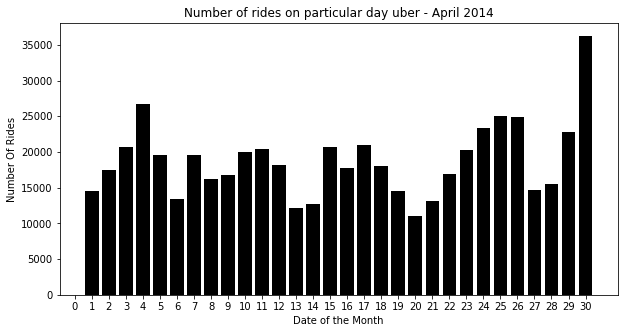

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(april14_data.Date_of_Month,bins=30,rwidth=0.8,range=(0.5,30.5),color='black')
plt.xticks(range(0,31))
plt.xlabel('Date of the Month')
plt.ylabel('Number Of Rides')
plt.title('Number of rides on particular day uber - April 2014')
plt.show()

In [ ]:
def CountRows(rows):
  return len(rows)

frequency = april14_data.groupby('Date_of_Month').apply(CountRows)
print(frequency)

Date_of_Month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64


In [ ]:
frequency_sorted = frequency.sort_values()
frequency_sorted

Date_of_Month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

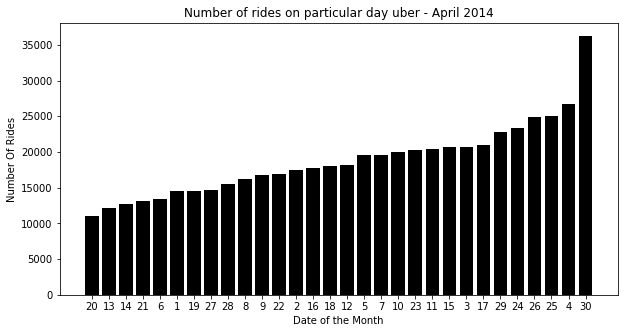

In [ ]:
plt.figure(figsize = (10, 5))
plt.bar(range(1 , 31), frequency_sorted,color='black')
plt.xticks(range(1,31),frequency_sorted.index)
plt.xlabel('Date of the Month')
plt.ylabel('Number Of Rides')
plt.title('Number of rides on particular day uber - April 2014')
plt.show()

Analyze the Hour

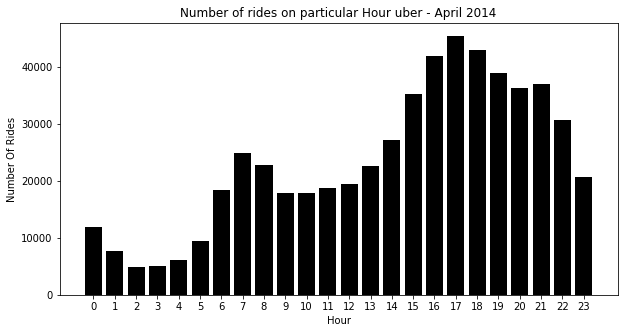

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(april14_data.Hour, bins=24, range=(-0.5,23.5),rwidth=0.8,color='black')
plt.xticks(range(0, 24))
plt.xlabel('Hour')
plt.ylabel('Number Of Rides')
plt.title('Number of rides on particular Hour uber - April 2014')
plt.show()

In [ ]:
def CountRows(rows):
  return len(rows)

frequency = april14_data.groupby('Hour').apply(CountRows)
print(frequency)

Hour
0     11910
1      7769
2      4935
3      5040
4      6095
5      9476
6     18498
7     24924
8     22843
9     17939
10    17865
11    18774
12    19425
13    22603
14    27190
15    35324
16    42003
17    45475
18    43003
19    38923
20    36244
21    36964
22    30645
23    20649
dtype: int64


Analyze the Weekday

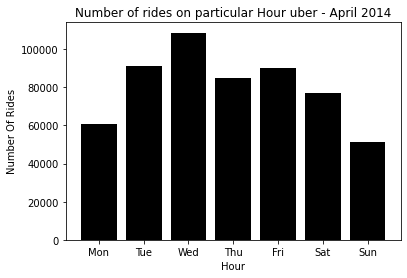

In [ ]:
plt.figure(figsize = (6, 4))
plt.hist(april14_data.Weekday, bins=7, range=(-0.5,6.5),rwidth=0.8,color='black')
plt.xticks(range(0, 7),'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Hour')
plt.ylabel('Number Of Rides')
plt.title('Number of rides on particular Hour uber - April 2014')
plt.show()

In [ ]:
def CountRows(rows):
  return len(rows)

frequency = april14_data.groupby('Weekday').apply(CountRows)

print(frequency)

Weekday
0     60861
1     91185
2    108631
3     85067
4     90303
5     77218
6     51251
dtype: int64


Cross Analysis (Hour, Day of Week)

In [ ]:

Hour_Day = april14_data.groupby('Hour Weekday'.split()).apply(CountRows).unstack()
Hour_Day

Weekday,0,1,2,3,4,5,6
Hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


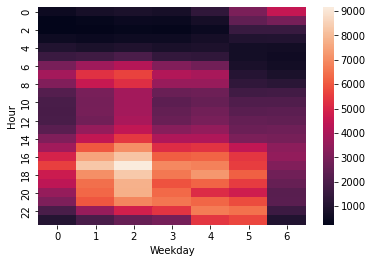

In [ ]:
sns.heatmap(Hour_Day)

Analyze Latitude and Longitude

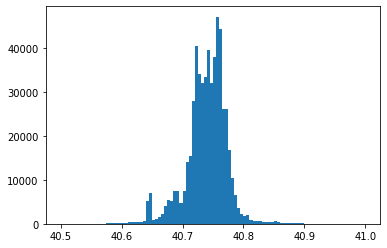

In [ ]:
plt.hist(april14_data['Lat'],bins=100,range=(40.5,41))
plt.show()

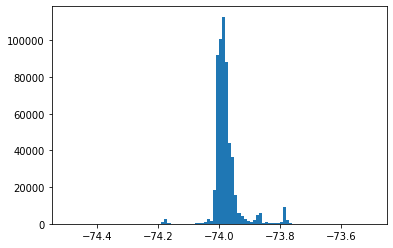

In [ ]:
plt.hist(april14_data['Lon'],bins=100,range=(-74.5,-73.5))
plt.show()

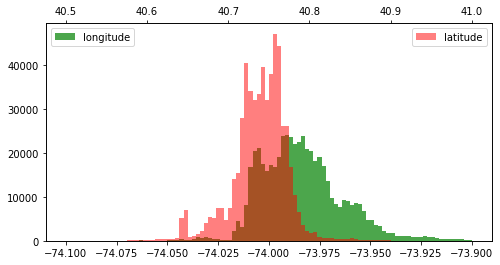

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(april14_data['Lon'],bins=100,range=(-74.1,-73.9),color='g',alpha=0.7,label='longitude')
plt.legend(loc='upper left')
plt.twiny()
plt.hist(april14_data['Lat'],bins=100,range=(40.5,41),color='r',alpha=0.5,label='latitude')
plt.legend(loc='upper right')

(40.7, 41.0)

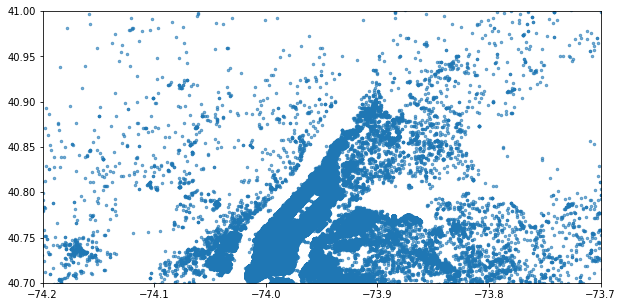

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(april14_data['Lon'],april14_data['Lat'],'.',ms=5,alpha=0.6)
plt.xlim(-74.2,-73.7)
plt.ylim(40.7,41)